In [192]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import seaborn as sns
sns.set(style="whitegrid")
sns.set(font_scale=1.2)

import matplotlib.pyplot as plt
%matplotlib inline


import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


def transform_format(val):
#     print (val)
    if (val == 0):
        return 255
    else:
        return val
    
    
## Segunda parte - pacotes para treinamento do modelo de classificação de e-mails comuns ou spams

# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes


In [193]:
#Tabela de mensagens classificadas em "comum" e "spam", contendo também contagem de palavras
df=pd.read_csv(r'sms_senior.csv', encoding= 'unicode_escape')
df.head()

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


In [194]:
#Separacao da matriz de contagem de palavras importantes para cada mensagem, matriz conhecida por "Bag of Words" 
BagOfWords=(df[df.columns[1:-4].tolist()]).copy()
BagOfWords.head()

,got,great,wat,free,text,txt,win,already,dun,say,...,sleep,care,mins,phone,number,wish,leave,thing,many,wan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


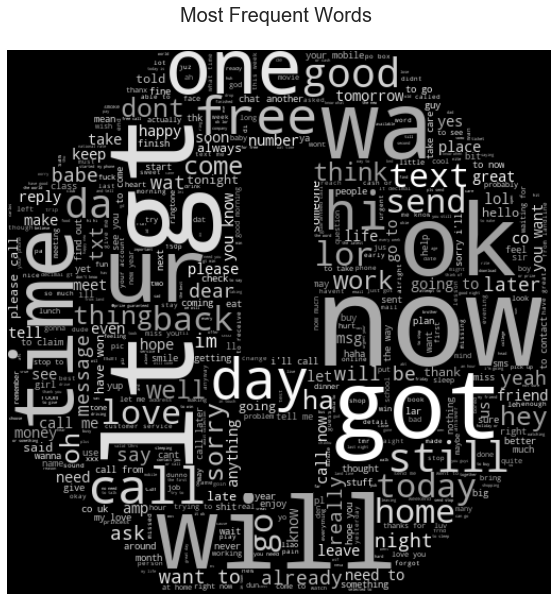

In [195]:
###PRIMEIRA ETAPA
# 1. Exibir gráfico com as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras, nuvem de palavras, etc).

# O gráfico escolhido para apresentação das palavras mais frequentes foi a nuvem de palavras desenhadas 
# na forma do símbolo de spam.



# As palavras da base de dados foram agregadas na variável text e padronizadas para letra minúscula 
text = df[df.columns[0]].str.cat(sep=' ').lower()



# A imagem do símbolo de spam é carregada como "mask" da nuvem de palavras e transformada para que 
# funcione na função de contornar as palavras
mask = np.array(Image.open(r'spam_icon.png'))
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

    
    
# É criada e gerada, então, a imagem de nuvem de palavras
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_mask, contour_width=3, contour_color='black')
wc.generate(text)

# Plotando a nuvem de palavras
plt.figure(figsize=[20,10])
default_colors = wc.to_array()
plt.title("Most Frequent Words \n", fontdict = {'fontsize' : 20})
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()

,Month,IsSpam,Messages
0,January,no,1687
1,January,yes,266
2,February,no,1512
3,February,yes,244
4,March,no,1628
5,March,yes,237


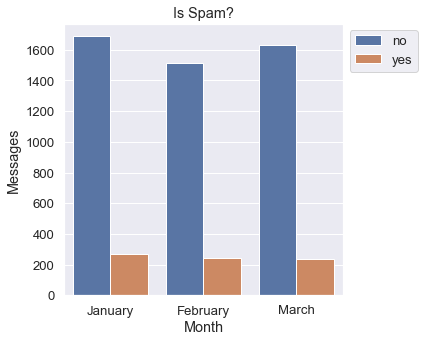

In [196]:
# 2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;



# Para exibir a quantidade de mensagens comuns e spams para cada mês, foi criada a coluna "month", 
# extraindo da coluna "Date" o mês de cada mensagem
df['Month']=pd.DatetimeIndex(df['Date']).month_name()
df['N_Month']=pd.DatetimeIndex(df['Date']).month
# Foi criada uma tabela auxiliar para foco nas informações de data, mês e classificação de mensagem spam ou comum
df2=df[['Date', 'N_Month', 'Month', 'IsSpam']]

# Foram agrupadas as colunas de mês e classificação e contadas a quantidade de mensagens
df3=df2.groupby(['N_Month','Month', 'IsSpam']).count().reset_index()
df3 = df3.rename(columns={'Date':'Messages'})
display(df3[['Month', 'IsSpam','Messages']])

# O gráfico com as quantidades de mensagens comuns e spams para cada mês pôde ser gerado
plt.figure(figsize=(5,5))
ax = sns.barplot(x="Month", y="Messages", hue="IsSpam",data=df3)
ax.set_title('Is Spam?')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

,January,February,March
max,190.000000,100.000000,115.000000
min,2.000000,2.000000,2.000000
mean,16.336918,16.029043,16.285255
50%,13.000000,13.000000,12.000000
std,12.557171,11.042459,11.576213
variance,157.601796,121.866469,133.936860


Text(0.5, 1.0, 'Statistical Indicators \n')

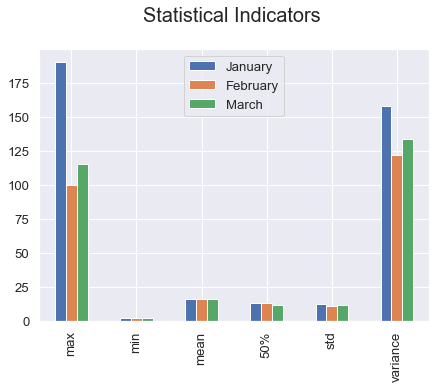

In [197]:
#3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês;

# Nesta etapa são calculados os indicadores estatísticos básicos de máximo, mínimo, média, mediana, desv. pad. e variância para cada mês

df_temp=df[['Word_Count', 'Date']].copy()
# Uma nova coluna representa o mês da coluna "Date"
df_temp['Month']=pd.DatetimeIndex(df['Date']).month_name()
df4=pd.DataFrame()

df5=pd.DataFrame(index=['max', 'min', 'mean', '50%', 'std', 'variance'])

for month in df_temp['Month'].unique().tolist():
#     print(month)
    df4=df_temp[df_temp['Month']==month].describe()
    df4.loc['variance','Word_Count']=np.var(df_temp[df_temp['Month']==month]['Word_Count']) 
    df4 = df4.rename(columns={'Word_Count':month})
#     display(df4)
    df5 = df5.merge(df4, left_index=True, right_index=True)

    
display(df5)

df5.plot(kind="bar",figsize=(7,5))
plt.title('Statistical Indicators \n', fontdict = {'fontsize' : 20})

In [198]:
#4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).


df['Day']=pd.DatetimeIndex(df['Date']).day
df_2=df[df['IsSpam']=='no'][['Date', 'Day','Month', 'IsSpam']]
df_3=df_2.groupby(['Day','Month']).count().reset_index().sort_values(by=('Month'))

for month in df_3['Month'].unique().tolist():
    df_temp=df_3[df_3['Month']==month].sort_values(by='Date',ascending=False).iloc[0][['Day','Month','Date']]
    #display(df_temp)
    print('\n', df_temp['Day'], '/', df_temp['Month'][:3].upper(), 'was the day with more messages in', df_temp['Month'],':', 
         df_temp['Date'], 'of them.')



 13 / FEB was the day with more messages in February : 72 of them.

 1 / JAN was the day with more messages in January : 69 of them.

 8 / MAR was the day with more messages in March : 69 of them.


In [199]:
###SEGUNDA ETAPA

#aplicar um método capaz de classificar automaticamente as mensagens como “comum” e “spam”. 
#Como você considera os resultados encontrados? Justifique.

# Para encontrar um método capaz de classificar automaticamente as mensagens, foi escolhido o modelo usando 
# o método Multinomial Naive Bayes e obtido a acuracidade do modelo para as mensagens separando um parte 
# do dado para treinamento e outra para teste.


# Vetorizando as palavras na matriz de treinamento baseada no Bag of Words
matrix = CountVectorizer()
X=BagOfWords.to_numpy()

# Treinamento do modelo a partir da matriz vetorizada (BagOfWords), 
# sua classificação em "IsSpam" e 25% do dado utilizado para teste do modelo 
X_train, X_test, y_train, y_test = train_test_split(X, df['IsSpam'], test_size=0.25, random_state=2)

# O modelo de classificação automática usou o método de Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
# Foi usada a massa de teste para verificar a acuracidade do modelo
predicted= clf.predict(X_test)
# print(predicted)

accuracy= metrics.accuracy_score(y_test, predicted)
print("MultinomialNB Accuracy was",accuracy)

MultinomialNB Accuracy was 0.9634146341463414


In [200]:
#Para avaliar como o erro foi distribuído, vemos qual era a real classificação da mensagem e como o modelo a classificou
#

test=df.iloc[y_test.index][['Full_Text','IsSpam']]
test['Multinomial Naive Bayes']=predicted.tolist()
erro=test[test['IsSpam']!=test['Multinomial Naive Bayes']]

print(len(erro), 'mistaken classification', 'of', len(df)*0.25, 'messages')

print('\n\n Sample of messages wrongly classified:')
display(erro.head())

print('\n\nIn the', len(erro), 'wrongly classified messages, the number of:')
print('\nSpams that went to the main email was', len(erro[erro['Multinomial Naive Bayes']=='no']),
      ",",round(100*len(erro[erro['Multinomial Naive Bayes']=='no'])/len(erro),1), "%")
print('Common messages that went to the spam box was',len(erro[erro['Multinomial Naive Bayes']=='yes']),
      ",",round(100*len(erro[erro['Multinomial Naive Bayes']=='yes'])/len(erro),1), '%')
#predicted.tolist()

51 mistaken classification of 1393.5 messages


 Sample of messages wrongly classified:


,Full_Text,IsSpam,Multinomial Naive Bayes
3504,Ur TONEXS subscription has been renewed and yo...,yes,no
4265,1000's of girls many local 2 u who r virgins 2...,yes,no
4413,FreeMsg>FAV XMAS TONES!Reply REAL,yes,no
1900,PRIVATE! Your 2003 Account Statement for shows...,yes,no
380,Pls speak to that customer machan.,no,yes




In the 51 wrongly classified messages, the number of:

Spams that went to the main email was 35 , 68.6 %
Common messages that went to the spam box was 16 , 31.4 %
